In [495]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [497]:
# Importing all relevant packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

#### Importing the "Leads" Dataset

In [500]:
# Importing lead dataset
leads = pd.read_csv("C:/Users/Anwita/Desktop/Upgrad/Course 2 - Machine Learning/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [502]:
#Checking how many rows and columns in Leads dataset
leads.shape

(9240, 37)

In [503]:
# Inspecting the different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [506]:
# Checking the summary of the dataset
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [508]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As can be seen there are a lot of categorical variables and many of these variables have lot of missing values in them.
We'll need to create to create dummy variables for all categorical variables and treat misisng values, accordingly.

#### Step 1: Data Cleaning and Preparation

In [512]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

We can see that lot of columns have high number of missing values. Some of them are not needed for analysis. In total, the data set has 9000 datapoints so we'll eliminate all columns having greater than 3000 missing values.

In [515]:
# Droping all the columns in which greater than 
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [517]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [519]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Mumbai has highest numbers of leads. But we cannot make any meaningful inference from this variable so we'll drop it.t.

In [522]:
# dropping the "City" feature
leads.drop(['City'], axis = 1, inplace = True)

In [523]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

Highest number of leads from INDIA

In [527]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [529]:
#Now checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [531]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

#### Visualizing the features with Select values

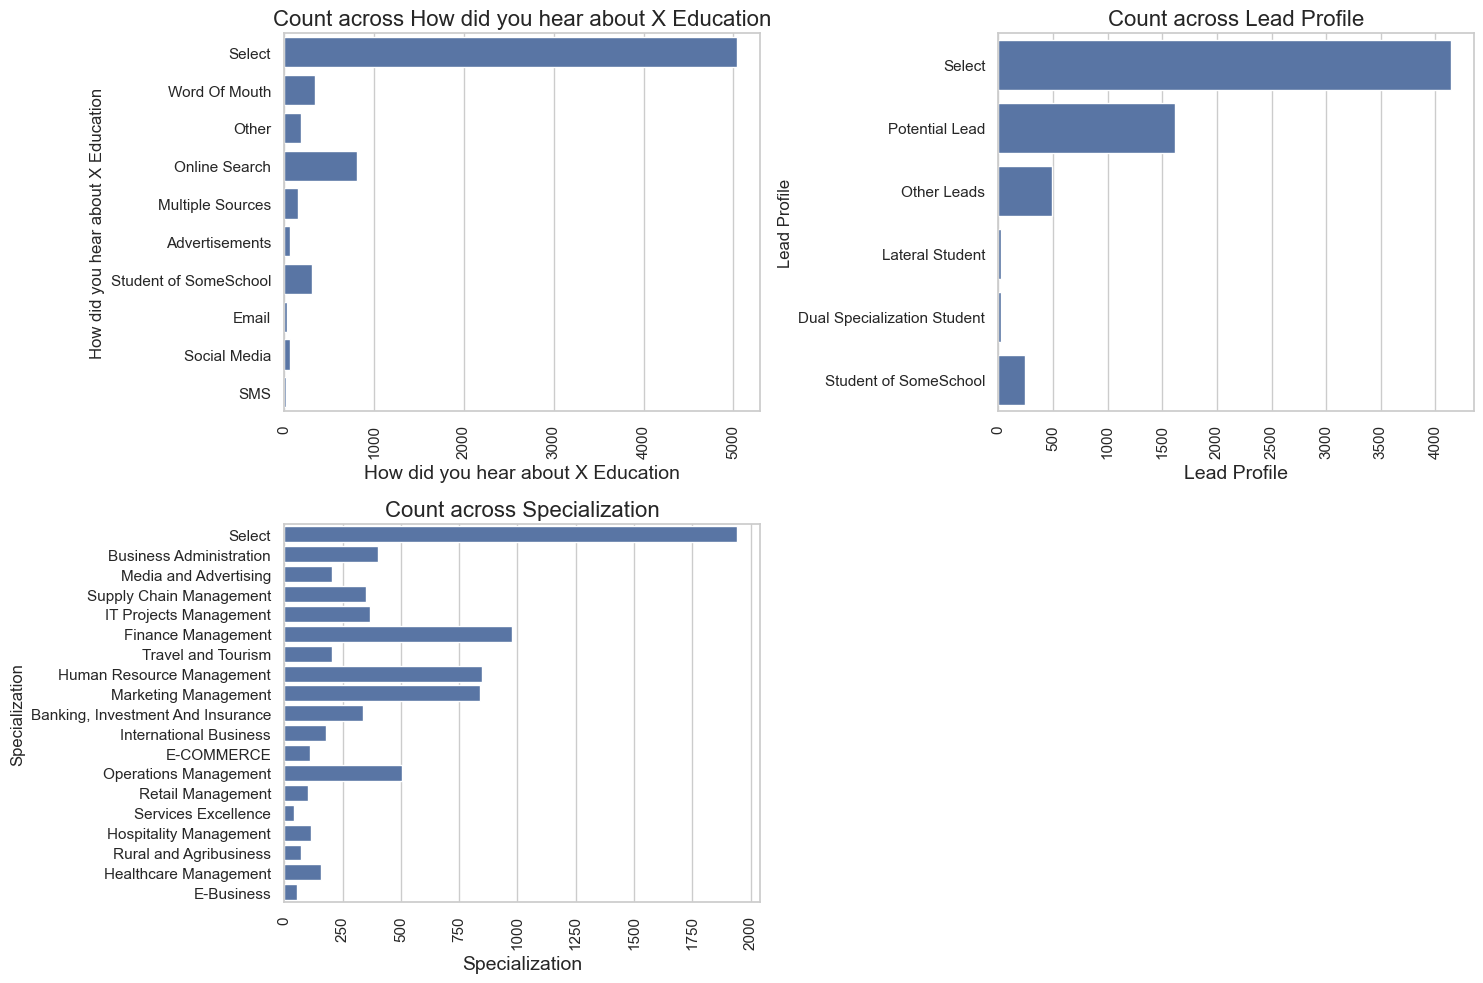

In [534]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

Some columns have a category named 'Select' which basically translates to all cases where no selection was made for Industry domain. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [536]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


The following three columns now have the level 'Select'. Let's check them once again.

In [540]:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [542]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [543]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Visualizing the features

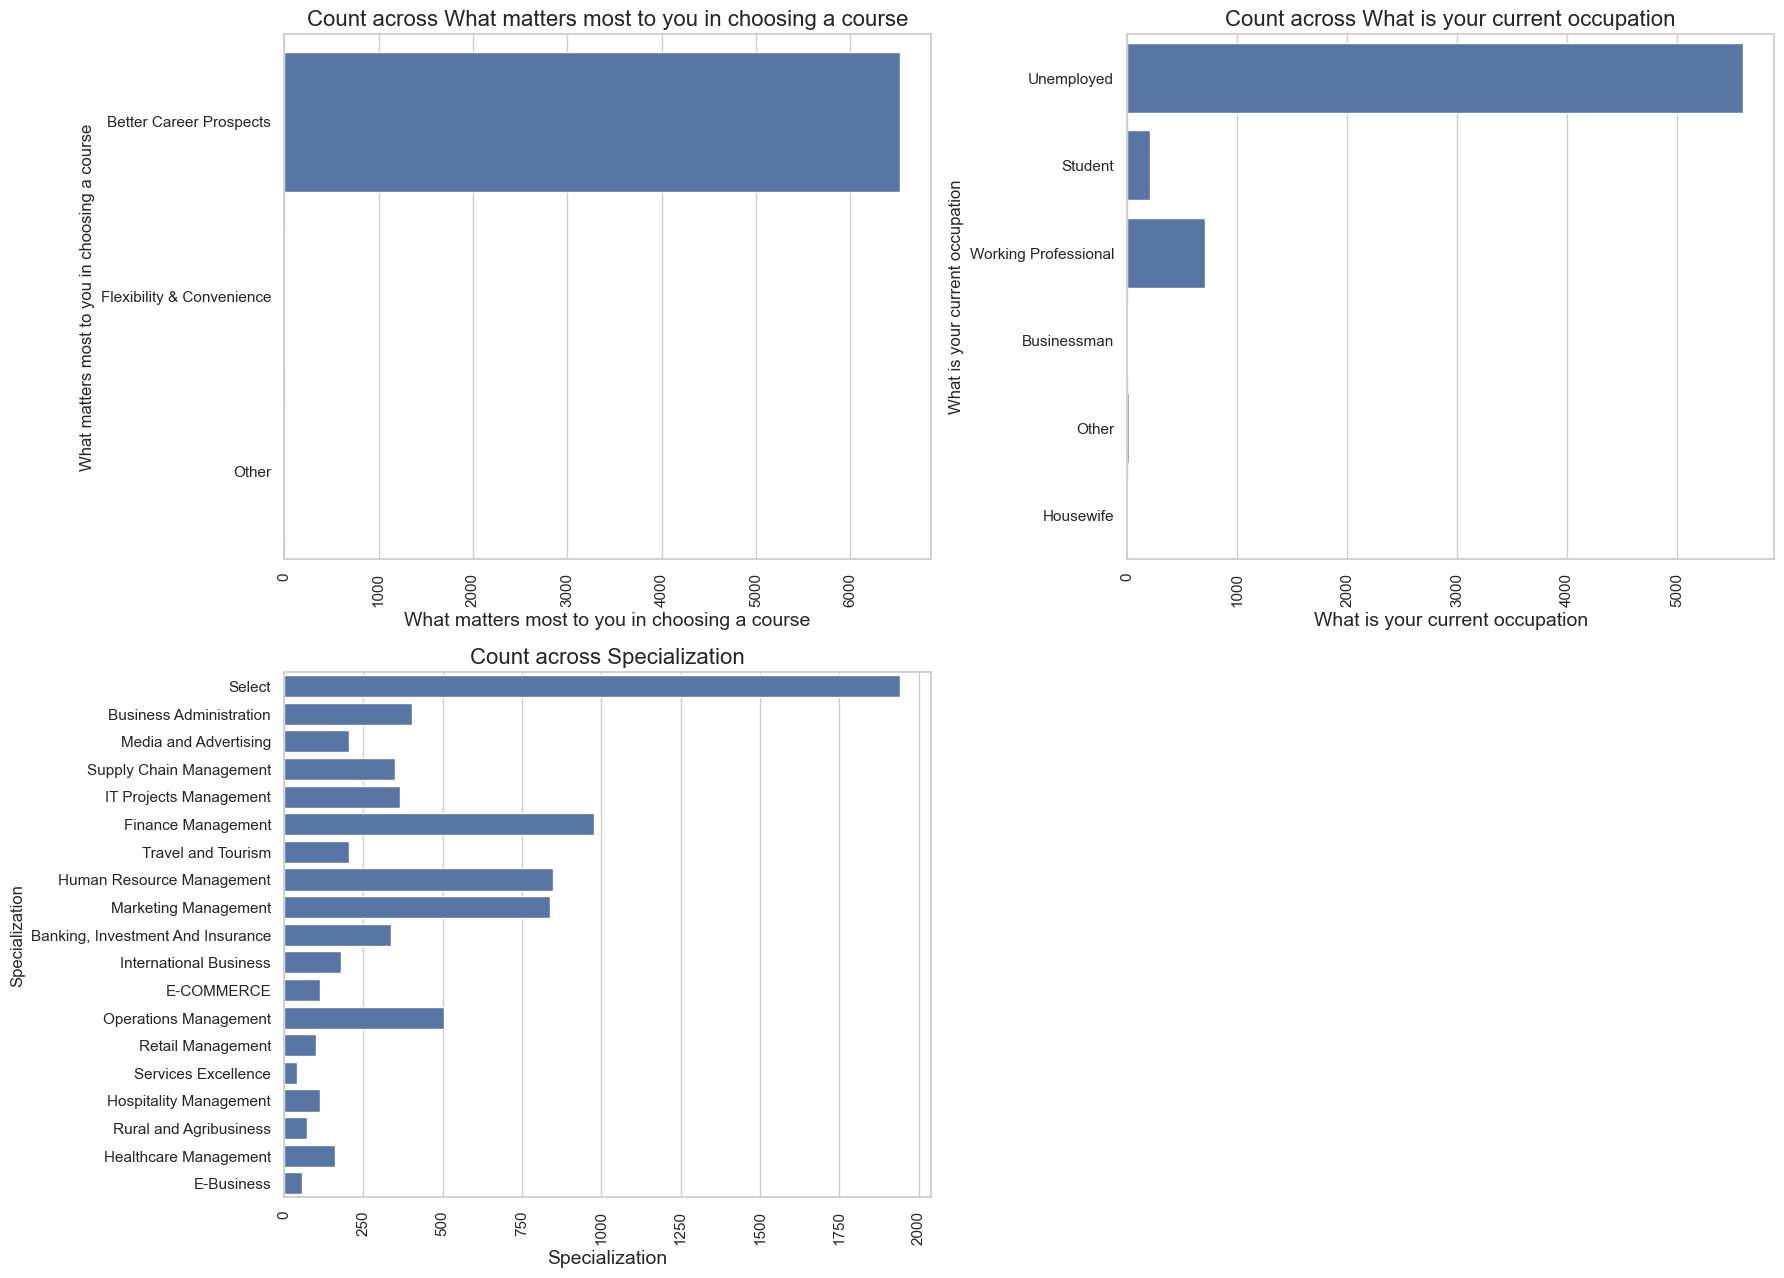

In [547]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()

As can be seen that the levels of "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis s
So it's best that we drop them.

In [550]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

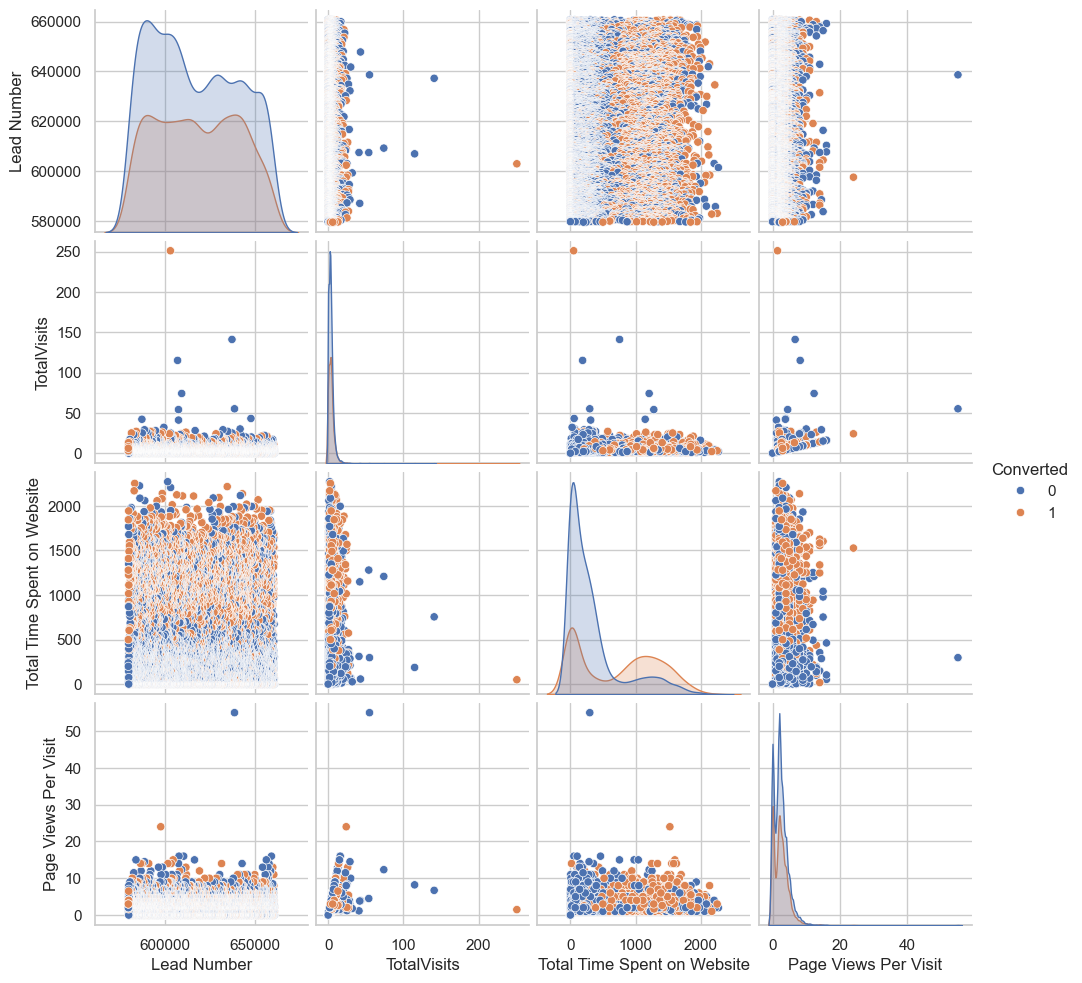

In [553]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

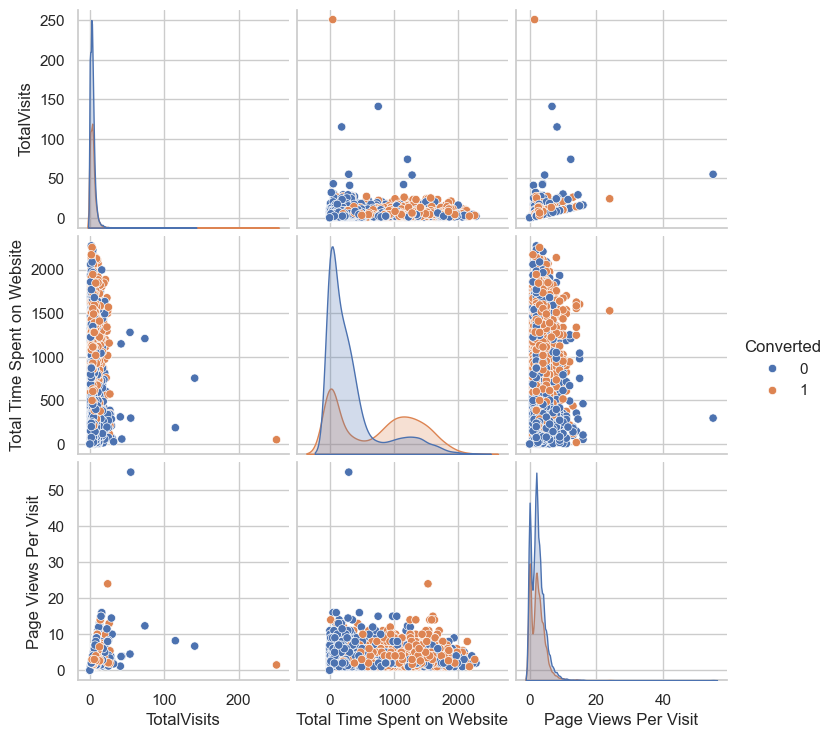

In [555]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [557]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Converted
0    -1.457907                    -1.473767             -1.454706  -0.791863
1     0.747918                     0.729628              0.308534  -0.791863
2    -0.141636                     1.306093              0.065574   1.262845
3    -0.640428                     0.264936             -0.536967  -0.791863
4    -0.141636                     1.252499             -0.536967   1.262845

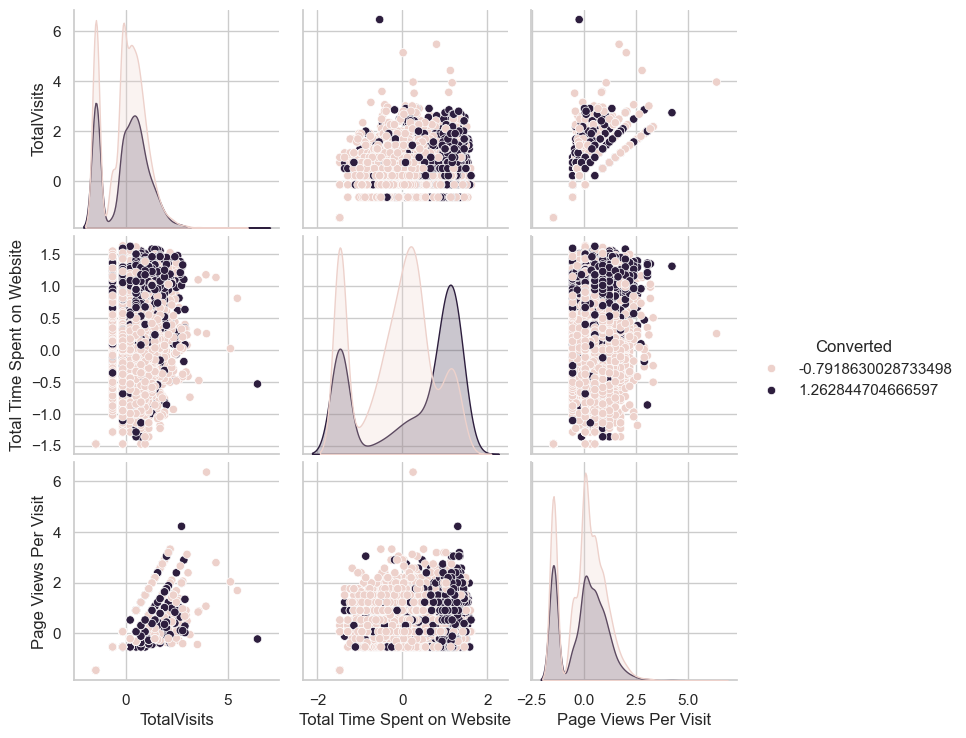

In [558]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [560]:
# Dropping the below columns from ur Analysis

In [561]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [562]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

The variable 'What matters most to you in choosing a course' has the catgory 'Better Career Prospects' occuring 6528 times while the other two levels appear once twice and once respectively. 
So we should dropping this column as well.

In [573]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

KeyError: "['What matters most to you in choosing a course'] not found in axis"

In [575]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Column named 'What is your current occupation' has a lot of null values. We can drop the entire variable altogether but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column.

In [578]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

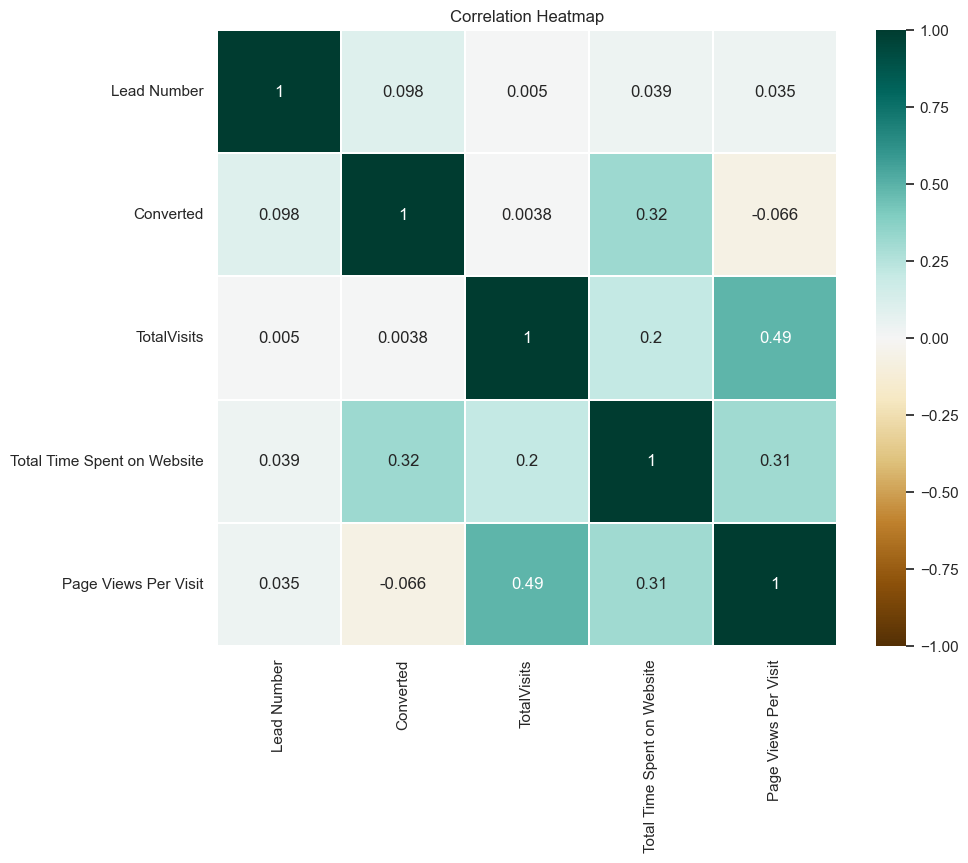

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_leads = leads.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_leads.corr(), annot=True, cmap="BrBG", robust=True, linewidth=0.1, vmin=-1)
plt.title("Correlation Heatmap")
plt.show()

#### Analysing Categorical features

Skipping 'Prospect ID' - 6550 unique values, 0.00% missing


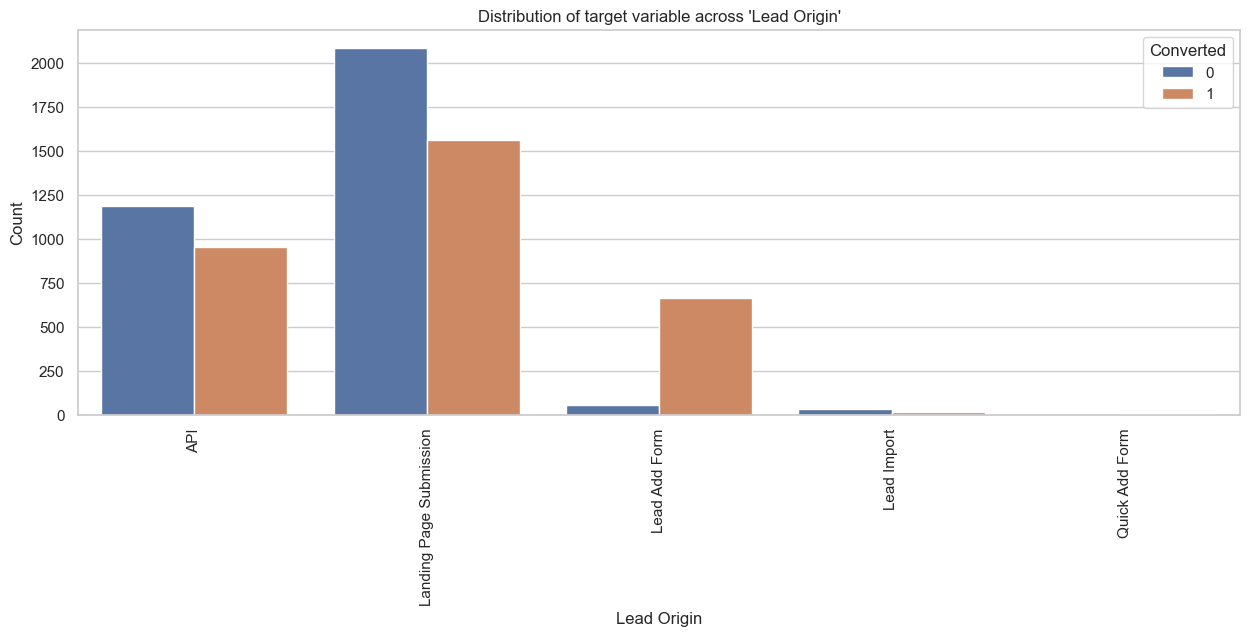

Skipping 'Lead Source' - 16 unique values, 0.55% missing


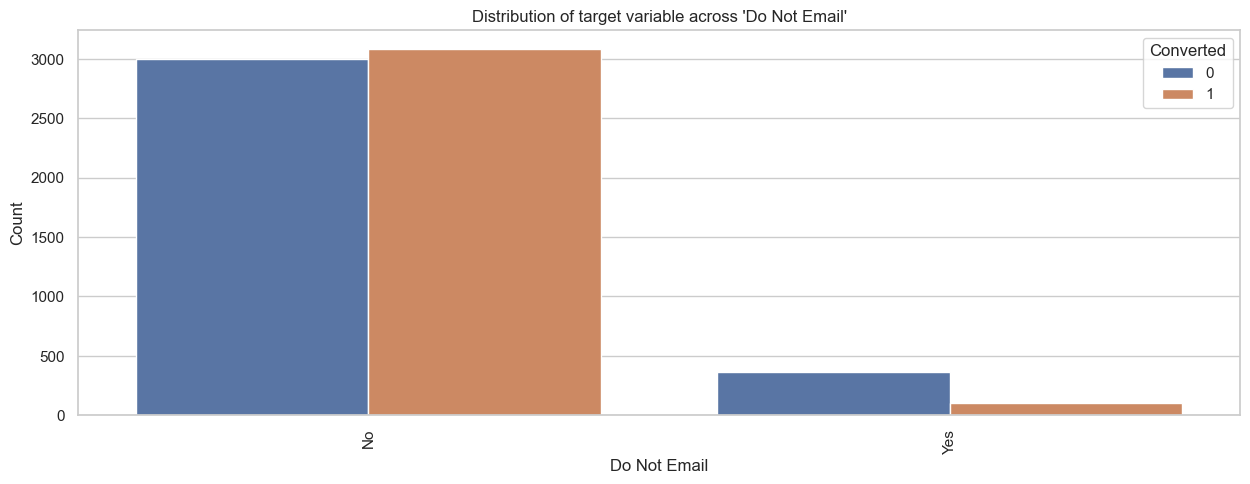

Skipping 'Last Activity' - 16 unique values, 1.57% missing
Skipping 'Specialization' - 19 unique values, 0.27% missing


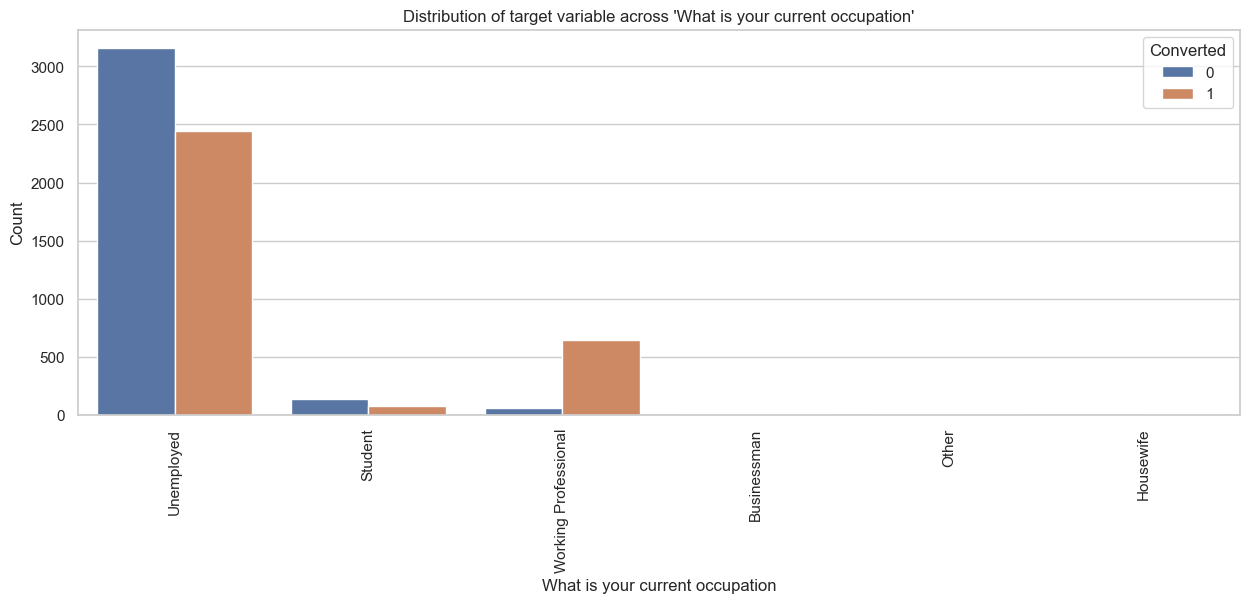

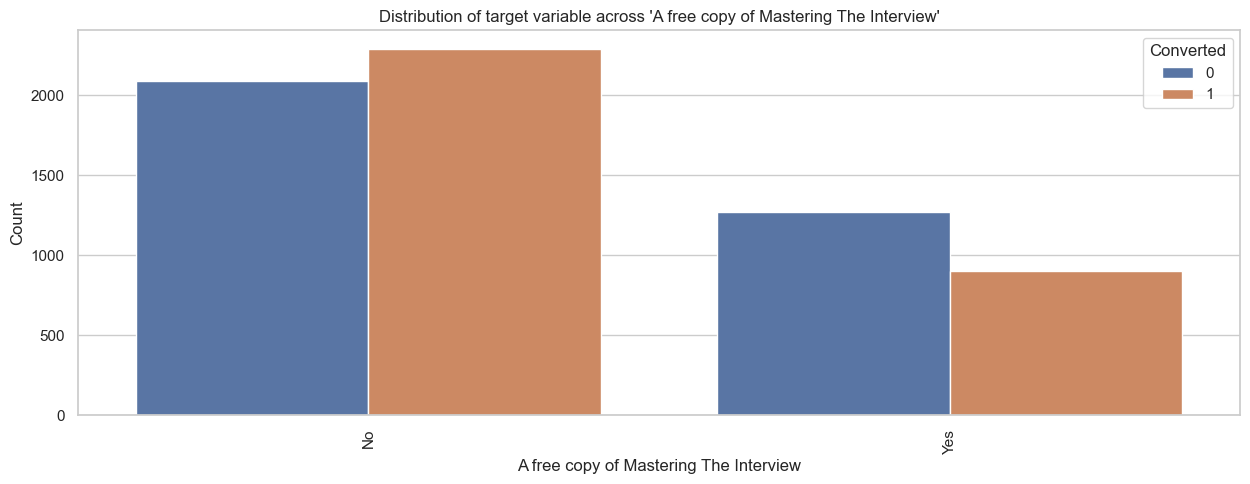

Skipping 'Last Notable Activity' - 14 unique values, 0.00% missing


In [583]:
conv = leads.select_dtypes(include="object").columns

for col in conv:
    unique_vals = leads[col].nunique()
    missing_pct = leads[col].isnull().mean()

    # Skip columns with too many unique values or >50% missing
    if unique_vals > 10 or missing_pct > 0.5:
        print(f"Skipping '{col}' - {unique_vals} unique values, {missing_pct:.2%} missing")
        continue

    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, data=leads, hue='Converted')
    plt.xticks(rotation=90)
    plt.title(f"Distribution of target variable across '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [585]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [588]:
# Dropping the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [590]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [592]:
# Dropping the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [594]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [596]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [598]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

We can see that now the data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [601]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough

In [604]:
# Let's look at the dataset again

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Now, clearly the variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables.

In [607]:
# Dropping the "Prospect ID" and "Lead Number" 
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [609]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### Dummy variable creation
The next step is dealing with categorical variables present in dataset. So first we'll find out which variables are actually categorical variables.

In [612]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [614]:
print(leads.columns.tolist())

['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [616]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [618]:
print(leads.columns.tolist())

['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form

In [620]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization', dtype=int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [622]:
# Let's take a look at the dataset again

leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_

#### Test-Train Split
The next step is to spliting the dataset into training an testing sets.

In [625]:
# Put all the feature variables in X

X = leads.drop(['Converted'], axis=1)
X.head()

Lead Origin     Lead Source Do Not Email  TotalVisits  \
0                      API      Olark Chat           No          0.0   
1                      API  Organic Search           No          5.0   
2  Landing Page Submission  Direct Traffic           No          2.0   
3  Landing Page Submission  Direct Traffic           No          1.0   
4  Landing Page Submission          Google           No          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0           

In [627]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [629]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [631]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 82)
y_train Size (4461,)


#### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [634]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

Lead Origin     Lead Source Do Not Email  TotalVisits  \
8003  Landing Page Submission  Direct Traffic           No     0.015936   
218   Landing Page Submission  Direct Traffic           No     0.015936   
4171  Landing Page Submission  Direct Traffic           No     0.023904   
4037                      API      Olark Chat           No     0.000000   
3660            Lead Add Form       Reference           No     0.000000   

      Total Time Spent on Website  Page Views Per Visit  \
8003                     0.029489                 0.125   
218                      0.082306                 0.250   
4171                     0.034331                 0.375   
4037                     0.000000                 0.000   
3660                     0.000000                 0.000   

                Last Activity             Specialization  \
8003                 SMS Sent     IT Projects Management   
218        Email Link Clicked  Human Resource Management   
4171  Page Visited on Website         Travel and Tourism   
4037             Email Opened                     Select   
3660                 SMS Sent         Finance Management   

     What is your current occupation A free copy of Mastering The Interview  \
8003                      Unemployed                                    Yes   
218                       Unemployed                                    Yes   
4171                      Unemployed                                    Yes   
4037                      Unemployed                                     No   
3660                      Unemployed                                     No   

     Last Notable Activity  Lead Origin_Landing Page Submission  \
8003              SMS Sent                                    1   
218               Modified                                    1   
4171              Modified                                    1   
4037          Email Opened                                    0   
3660              SMS Sent                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_Olark Chat  \
8003                      0                       0   
218                       0                       0   
4171                      0                       0   
4037                      0                       1   
3660                      0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
8003                           0                              0   
218                            0                              0   
4171                           0                              0   
4037                           0                              0   
3660                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
8003                          0                      0   
218                           0                      0   
4171                          0                      0   
4037                          0                      0   
3660                          0                      1   

      Lead Source_Referral Sites  Lead Source_Social Media  

#### Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

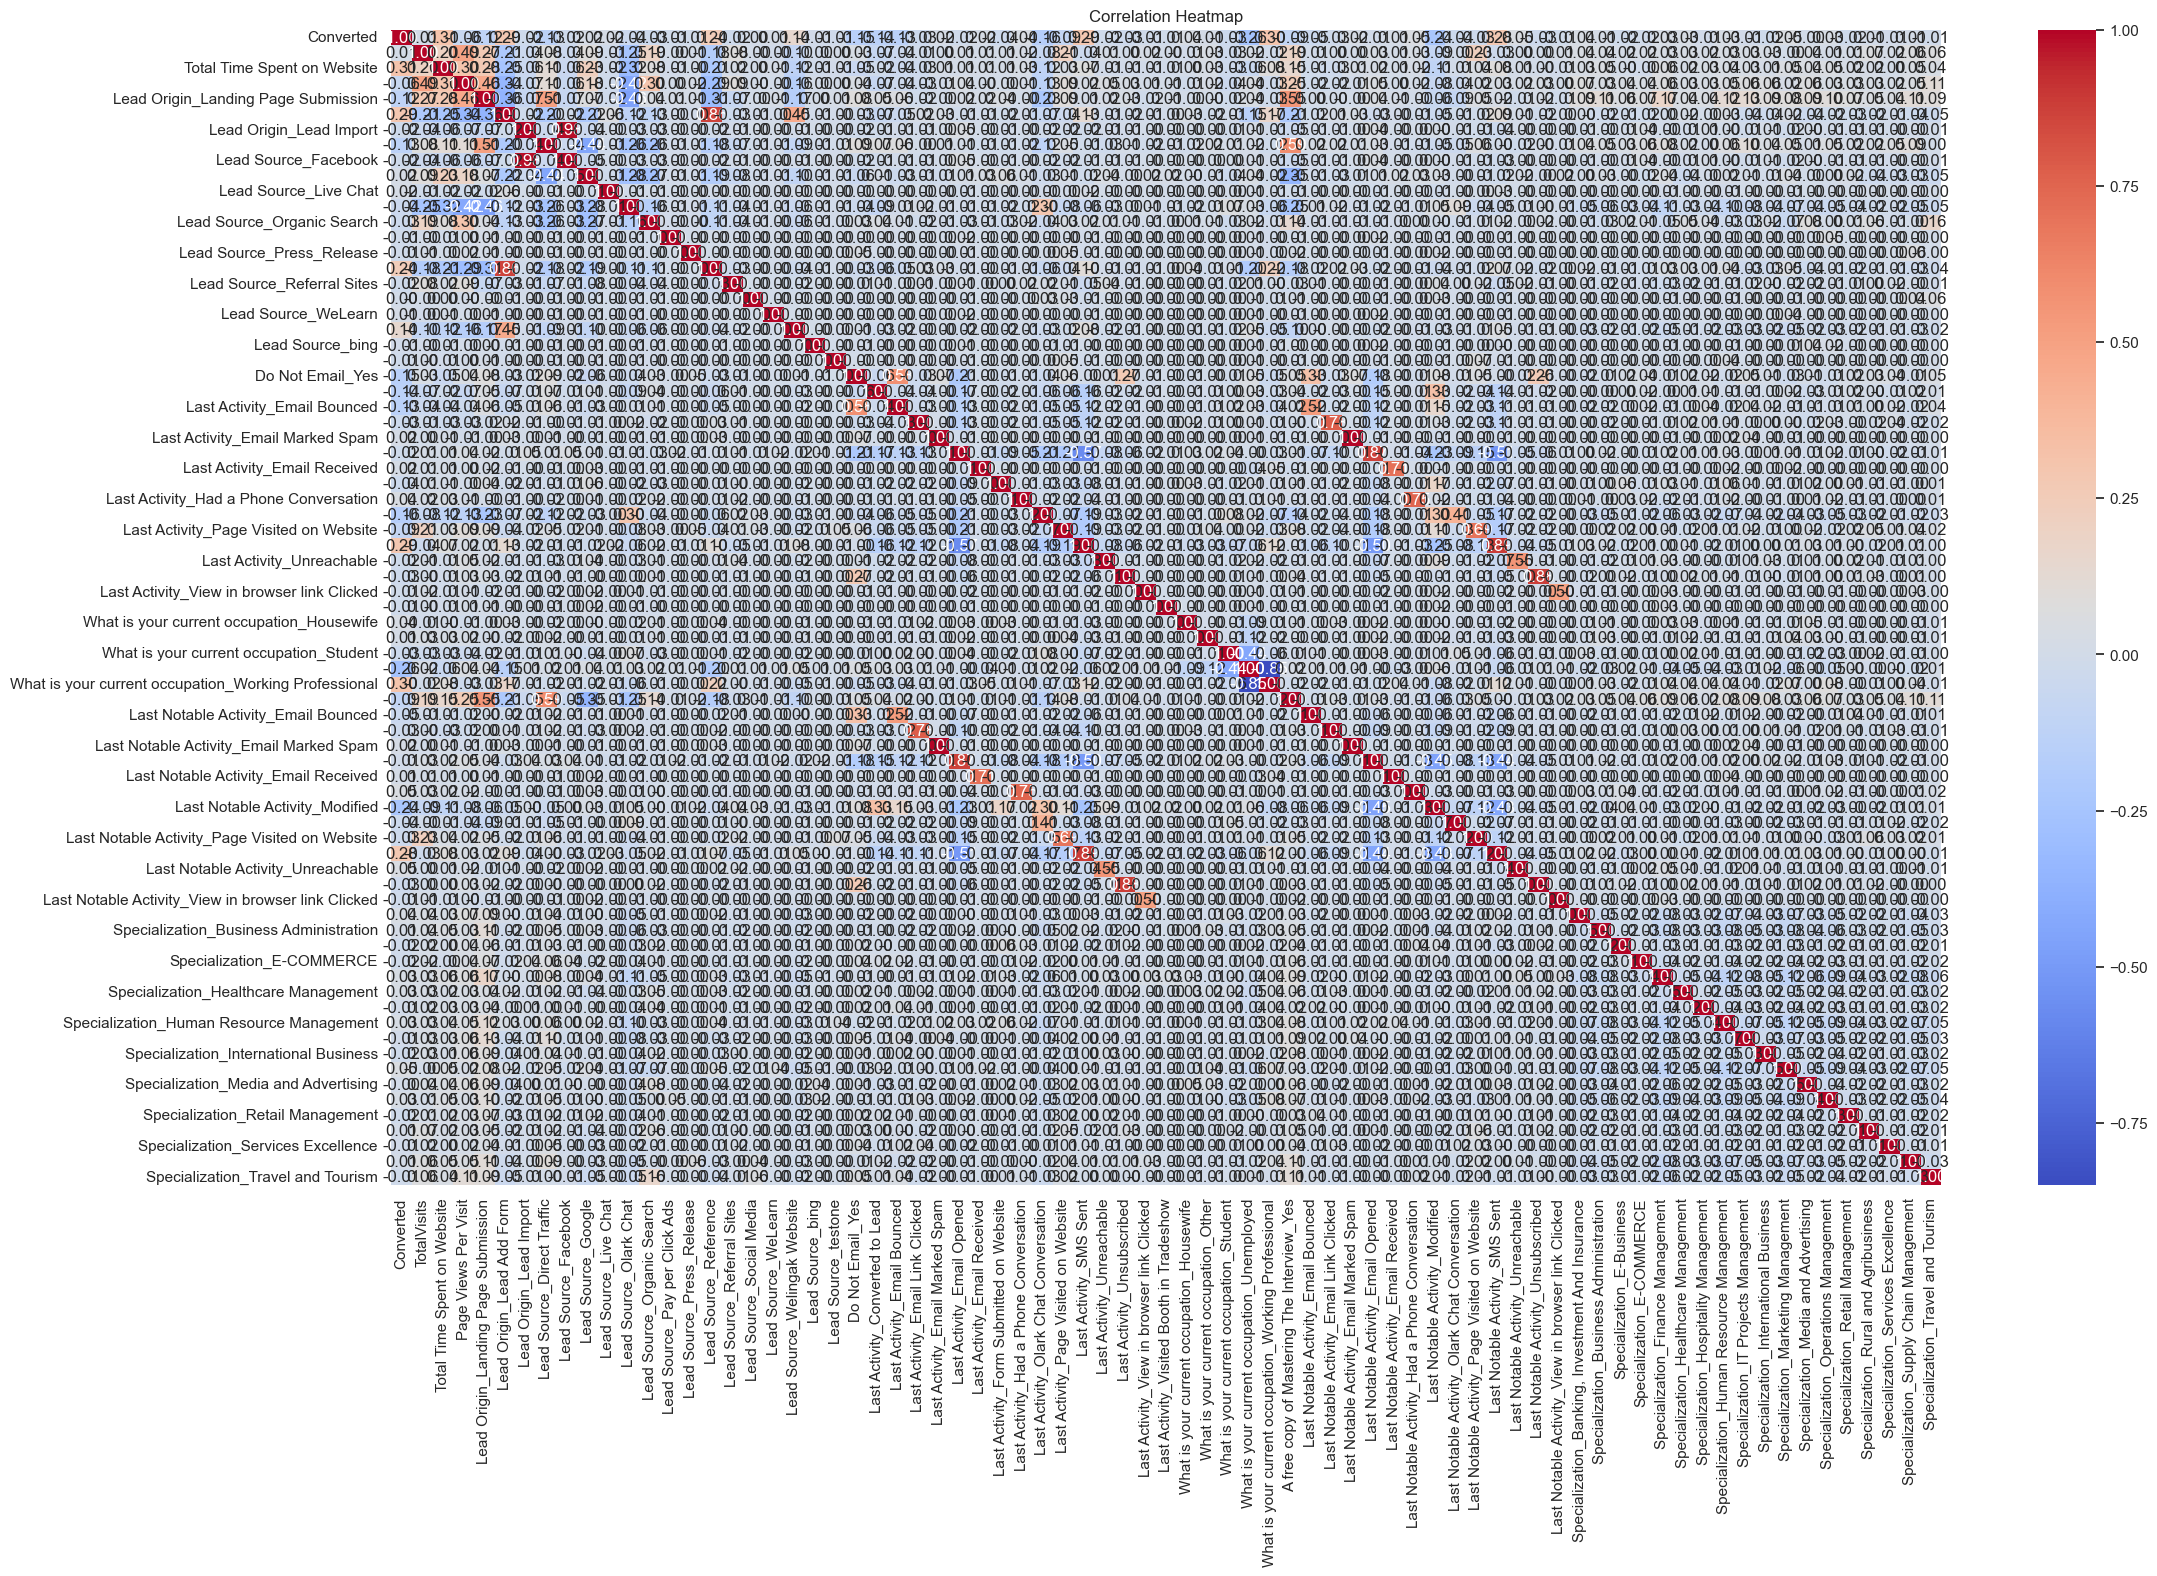

In [637]:
# Looking at the correlation table
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_leads = leads.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(numeric_leads.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Step 2: Model Building
Let's now move to model building. A is evident, we cannot deal with all the variables present in the dataset.. So theideal wayy to approach this is to select a small set of features from this pool of variables using RFE.

In [640]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [642]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [643]:
from sklearn.preprocessing import LabelEncoder

X_train_encoded = X_train.copy()
for col in X_train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])

In [646]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train_encoded, y_train)

In [647]:
selected_features = X_train_encoded.columns[rfe.support_]
print("Selected features:\n", selected_features)

Selected features:
 Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [650]:
# Putting all the columns selected by RFE in the variable 'col'

col = selected_features

In [652]:
# Select only the columns selected by RFE

X_train = X_train[col]

#### Model 1

In [655]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.4
Date:                Sun, 23 Mar 2025   Deviance:                       4062.8
Time:                        13:22:27   Pearson chi2:                 4.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3776
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6649      0.609     -1.092      0.275      -1.858       0.528
TotalVisits                                              8.8617      2.586      3.426      0.001       3.792      13.931
Total Time Spent on Website                              4.3996      0.187     23.558      0.000       4.034       4.766
Lead Origin_Lead Add Form                                4.2003      0.260     16.143      0.000       3.690       4.710
Lead Source_Olark Chat                                   1.4473      0.123     11.757      0.000       1.206       1.689
Lead Source_Welingak Website                             2.0551      1.037      1.981      0.048       0.022       4.088
Do Not Email_Yes                                        -1.4521      0.195     -7.462      0.000      -1.834      -1.071
Last Activity_Had a Phone Conversation                   1.5806      0.983      1.608      0.108      -0.347       3.508
Last Activity_SMS Sent                                   1.0125      0.085     11.962      0.000       0.847       1.178
What is your current occupation_Housewife               22.5809   2.39e+04      0.001      0.999   -4.68e+04    4.68e+04
What is your current occupation_Student                 -1.2044      0.639     -1.884      0.060      -2.457       0.048
What is your current occupation_Unemployed              -1.3458      0.603     -2.233      0.026      -2.527      -0.165
What is your current occupation_Working Professional     1.2679      0.632      2.007      0.045       0.030       2.506
Last Notable Activity_Had a Phone Conversation          22.4099   2.09e+04      0.001      0.999    -4.1e+04     4.1e+04
Last Notable Activity_Modified                          -0.8122      0.090     -8.994      0.000      -0.989      -0.635
Last Notable Activity_Unreachable                        2.4965      0.807      3.093      0.002       0.914       4.079
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

#### Checking VIF

In [659]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10            What is your current occupation_Unemployed  4.59
6                 Last Activity_Had a Phone Conversation  2.45
12        Last Notable Activity_Had a Phone Conversation  2.44
1                            Total Time Spent on Website  2.39
2                              Lead Origin_Lead Add Form  1.71
7                                 Last Activity_SMS Sent  1.68
11  What is your current occupation_Working Professional  1.64
0                                            TotalVisits  1.63
13                        Last Notable Activity_Modified  1.58
3                                 Lead Source_Olark Chat  1.44
4                           Lead Source_Welingak Website  1.33
9                What is your current occupation_Student  1.12
5                                       Do Not Email_Yes  1.09
8              What is your current occupation_Housewife  1.01
14                     Last Notable Activity_Unreachable  1.01

VIFs seem to be in a decent range except for the first variable.

Let's first drop the variab l'What is your current occupation_Unemployed'c e since it has a high p-value as well as a high VIF.

In [662]:

X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

#### Model 2

In [665]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.1
Date:                Sun, 23 Mar 2025   Deviance:                       4068.1
Time:                        13:23:19   Pearson chi2:                 4.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0075      0.099    -20.229      0.000      -2.202      -1.813
TotalVisits                                              9.1807      2.602      3.529      0.000       4.081      14.280
Total Time Spent on Website                              4.4034      0.187     23.583      0.000       4.037       4.769
Lead Origin_Lead Add Form                                4.2085      0.260     16.172      0.000       3.698       4.719
Lead Source_Olark Chat                                   1.4495      0.123     11.770      0.000       1.208       1.691
Lead Source_Welingak Website                             2.0474      1.037      1.974      0.048       0.014       4.081
Do Not Email_Yes                                        -1.4470      0.194     -7.451      0.000      -1.828      -1.066
Last Activity_Had a Phone Conversation                   1.5697      0.983      1.596      0.110      -0.358       3.497
Last Activity_SMS Sent                                   1.0033      0.085     11.871      0.000       0.838       1.169
What is your current occupation_Housewife               23.9181   2.39e+04      0.001      0.999   -4.68e+04    4.68e+04
What is your current occupation_Student                  0.1341      0.221      0.606      0.545      -0.300       0.568
What is your current occupation_Working Professional     2.6065      0.200     13.033      0.000       2.214       2.998
Last Notable Activity_Had a Phone Conversation          22.4066   2.09e+04      0.001      0.999    -4.1e+04     4.1e+04
Last Notable Activity_Modified                          -0.8121      0.090     -8.999      0.000      -0.989      -0.635
Last Notable Activity_Unreachable                        2.5000      0.805      3.105      0.002       0.922       4.078
========================================================================================================================
"""

#### Checking VIF

In [668]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                 Last Activity_Had a Phone Conversation  2.45
11        Last Notable Activity_Had a Phone Conversation  2.44
1                            Total Time Spent on Website  1.67
2                              Lead Origin_Lead Add Form  1.53
7                                 Last Activity_SMS Sent  1.48
0                                            TotalVisits  1.37
4                           Lead Source_Welingak Website  1.33
12                        Last Notable Activity_Modified  1.26
10  What is your current occupation_Working Professional  1.21
3                                 Lead Source_Olark Chat  1.13
5                                       Do Not Email_Yes  1.07
9                What is your current occupation_Student  1.03
13                     Last Notable Activity_Unreachable  1.01
8              What is your current occupation_Housewife  1.00

#### Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [672]:
# Use 'predict' to predict the probabilities on the train set

X_train_const = sm.add_constant(X_train)  # use this version for both

res = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()
y_train_pred = res.predict(X_train_const)

In [674]:
y_train_pred

8003    0.325630
218     0.090229
4171    0.079516
4037    0.363999
3660    0.960996
          ...   
8759    0.960996
100     0.645972
5877    0.918173
8658    0.261632
8217    0.397943
Length: 4461, dtype: float64

In [675]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32563015, 0.09022856, 0.07951554, 0.36399892, 0.96099605,
       0.12533454, 0.11635708, 0.92172757, 0.04772933, 0.98591362])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [679]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.325630
1          0         0.090229
2          1         0.079516
3          1         0.363999
4          1         0.960996

Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [682]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.325630          0
1          0         0.090229          0
2          1         0.079516          0
3          1         0.363999          0
4          1         0.960996          1

Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

#### Creating the Confusion matrix

In [686]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1937  375]
 [ 553 1596]]


In [688]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.791974893521632


In [690]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [692]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.742671009771987

In [694]:
# Calculating the 'specificity'

TN/(TN+FP)

0.83780276816609

#### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [697]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [699]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

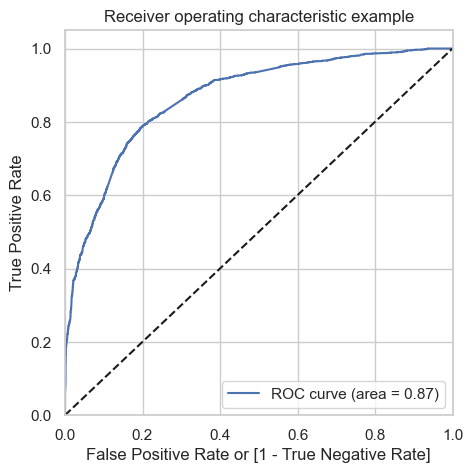

In [701]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [704]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.325630          0    1    1    1    1    0    0    0   
1          0         0.090229          0    1    0    0    0    0    0    0   
2          1         0.079516          0    1    0    0    0    0    0    0   
3          1         0.363999          0    1    1    1    1    0    0    0   
4          1         0.960996          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [706]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.574759  0.986971  0.191609
0.2   0.2  0.688187  0.950675  0.444204
0.3   0.3  0.765748  0.898092  0.642734
0.4   0.4  0.790854  0.805491  0.777249
0.5   0.5  0.791975  0.742671  0.837803
0.6   0.6  0.777628  0.673802  0.874135
0.7   0.7  0.742210  0.554211  0.916955
0.8   0.8  0.715535  0.459283  0.953720
0.9   0.9  0.663977  0.321080  0.982699


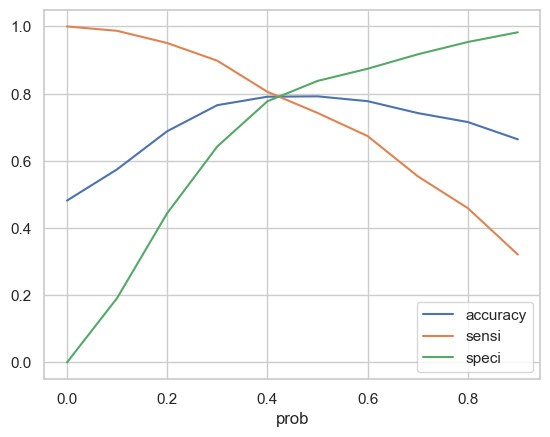

In [708]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.43, you get the optimal values of the three metrics. So let's choose 0.43 as our cutoff now.

In [711]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.325630          0    1    1    1    1    0    0    0   
1          0         0.090229          0    1    0    0    0    0    0    0   
2          1         0.079516          0    1    0    0    0    0    0    0   
3          1         0.363999          0    1    1    1    1    0    0    0   
4          1         0.960996          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [713]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939923783904954

In [715]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1853,  459],
       [ 460, 1689]], dtype=int64)

In [717]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [719]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.7859469520707306

In [721]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.8014705882352942

This cutoff point seems good to go!
#### 
Step 4: Making Predictions on the Test Set
Let's now make predicitons on the test set

In [724]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
# Selecting the columns in X_train for X_test as well

In [726]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                       0                             0                 0   
6122                       0                             0                 0   
9202                       0                             0                 0   
6570                       0                             0                 1   
2668                       0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                     1   
6122                                                     0   
9202                                                     0   
6570                                                     0   
2668                                                     0   

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Modified  Last Notable Activity_Unreachable  
4771                               0                                  0  
6122                               0                                  0  
9202                               0                                  0  
6570                               0                                  0  
2668                               1                                  0

In [728]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [730]:
# Checking X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.011952                     0.027289   
6583    1.0     0.011952                     0.152289   
5531    1.0     0.055777                     0.702025   
3056    1.0     0.011952                     0.417694   
4088    1.0     0.019920                     0.530370   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   
...                            ...               ...   
5828                             0                 0   
6583                             0                 0   
5531                             0                 0   
3056                             0                 1   
4088                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   
...                                       ...   
5828                                        0   
6583                                        0   
5531                

In [732]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test)

In [734]:
y_test_pred[:10]

4771    0.999812
6122    0.585366
9202    0.995924
6570    0.999259
2668    0.988529
4233    0.999971
3368    0.998630
9091    0.978030
5972    0.761078
3631    0.998179
dtype: float64

In [736]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [738]:
# Let's see the head

y_pred_1.head()

0
4771  0.999812
6122  0.585366
9202  0.995924
6570  0.999259
2668  0.988529

In [740]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [742]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [744]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [746]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.999812
1          0  0.585366
2          0  0.995924
3          1  0.999259
4          1  0.988529

In [748]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [750]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.999812
1          0         0.585366
2          0         0.995924
3          1         0.999259
4          1         0.988529

In [754]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [756]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.999812                1
1          0         0.585366                1
2          0         0.995924                1
3          1         0.999259                1
4          1         0.988529                1

In [758]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5057531380753139

In [760]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 57, 939],
       [  6, 910]], dtype=int64)

In [762]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [763]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.9934497816593887

In [766]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.0572289156626506

#### Precision-Recall View
Let's now also build the training model using the precision-recall view

In [769]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1937,  375],
       [ 553, 1596]], dtype=int64)

Precision =
     TP / TP + FP

In [772]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8097412480974124

Recall =
      TP / TP + FN

In [775]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.742671009771987

#### Precision and recall tradeoff
Importing the Precision recall curve library

In [778]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [780]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

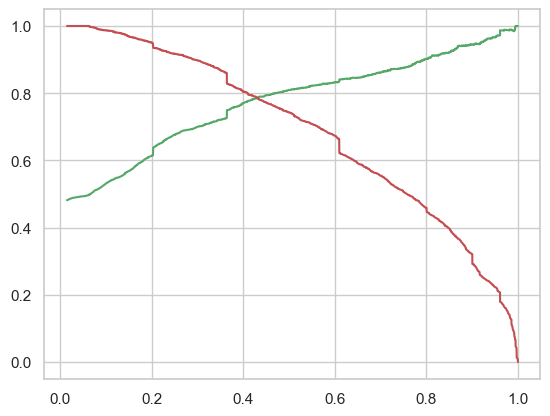

In [782]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [784]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.325630          0    1    1    1    1    0    0    0   
1          0         0.090229          0    1    0    0    0    0    0    0   
2          1         0.079516          0    1    0    0    0    0    0    0   
3          1         0.363999          0    1    1    1    1    0    0    0   
4          1         0.960996          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [786]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7933198834342076

In [788]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1867,  445],
       [ 477, 1672]], dtype=int64)

In [790]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Precision

In [793]:
TP/(TP+FP)

0.7897968823807274

#### Recall

In [796]:
TP/(TP+FN)

0.7780362959516054

#### Step 5: Making Predictions on the Test Set

In [799]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test)

In [801]:
y_test_pred[:10]

4771    0.999812
6122    0.585366
9202    0.995924
6570    0.999259
2668    0.988529
4233    0.999971
3368    0.998630
9091    0.978030
5972    0.761078
3631    0.998179
dtype: float64

In [803]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [805]:
# Let's see the head

y_pred_1.head()

0
4771  0.999812
6122  0.585366
9202  0.995924
6570  0.999259
2668  0.988529

In [807]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [809]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [811]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [813]:
# Checking the 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.999812
1          0  0.585366
2          0  0.995924
3          1  0.999259
4          1  0.988529

In [815]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [817]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.999812
1          0         0.585366
2          0         0.995924
3          1         0.999259
4          1         0.988529

In [819]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [821]:
# Checking y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.999812                1
1          0         0.585366                1
2          0         0.995924                1
3          1         0.999259                1
4          1         0.988529                1

In [822]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5031380753138075

In [825]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 52, 944],
       [  6, 910]], dtype=int64)

In [827]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [829]:
# Calculating the Precision

TP/(TP+FP)

0.49083063646170444

In [831]:
# Calculating Recall

TP/(TP+FN)

0.9934497816593887